In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [53]:
directory = '../output'
files = os.listdir(directory)
files = [file for file in files if file.endswith('y-output.csv')]
files

dfs = []

for i, file in enumerate(files):
    df = pd.read_csv(os.path.join(directory, file))
    # df.rename(columns={'line': 'experiment'}, inplace=True)
    df['experiment'] = i+1
    dfs.append(df)
    
df = pd.concat(dfs, ignore_index=True)
df = df[df['experiment'] == 1]
df.drop(columns=['experiment'], inplace=True)
df

,line,rho1,rho2,rho3,rho4,rho5,rho6,rho7,rho8,rho9,...,rho61,rho62,rho63,rho64,rho65,rho66,rho67,rho68,rho69,origin
0,0,0.121390,0.123565,0.118333,0.112890,0.106872,0.100799,0.094874,0.089155,0.083607,...,-0.048278,-0.050059,-0.051845,-0.053635,-0.055431,-0.057231,-0.059036,-0.060846,-0.062660,true
1,1,0.104425,0.105826,0.103841,0.101431,0.098083,0.094431,0.090697,0.086910,0.083026,...,-0.042961,-0.044776,-0.046597,-0.048421,-0.050251,-0.052086,-0.053926,-0.055772,-0.057622,true
2,2,0.105179,0.106771,0.103741,0.100707,0.096943,0.093009,0.089088,0.085211,0.081352,...,-0.043607,-0.045423,-0.047242,-0.049068,-0.050897,-0.052732,-0.054573,-0.056419,-0.058273,true
3,3,0.114776,0.117922,0.111966,0.104746,0.097279,0.090199,0.083586,0.077411,0.071530,...,-0.059172,-0.060979,-0.062792,-0.064611,-0.066437,-0.068269,-0.070105,-0.071947,-0.073796,true
4,4,0.092269,0.100266,0.092275,0.083993,0.077102,0.071121,0.065747,0.060809,0.056275,...,-0.058008,-0.059743,-0.061483,-0.063229,-0.064982,-0.066739,-0.068504,-0.070274,-0.072050,true
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1995,0.119701,0.124936,0.116871,0.110026,0.102248,0.098114,0.093030,0.088063,0.084140,...,-0.046476,-0.047948,-0.050126,-0.050857,-0.052987,-0.055293,-0.056303,-0.058263,-0.060738,pred
3996,1996,0.099278,0.100544,0.097743,0.093513,0.089679,0.087438,0.082530,0.079081,0.075598,...,-0.044945,-0.046081,-0.048884,-0.050287,-0.051203,-0.053769,-0.055359,-0.056964,-0.058866,pred
3997,1997,0.126343,0.127255,0.122009,0.115677,0.109277,0.102398,0.095567,0.089160,0.083991,...,-0.061487,-0.063407,-0.065870,-0.067112,-0.068441,-0.070669,-0.071898,-0.074272,-0.075666,pred
3998,1998,0.092604,0.095044,0.092877,0.090172,0.086926,0.083222,0.080461,0.076403,0.074223,...,-0.045362,-0.047118,-0.049181,-0.050676,-0.052997,-0.055115,-0.056226,-0.057583,-0.059994,pred


In [45]:
df_long = df.copy()
df_long.drop(columns=['line'], inplace=True)
df_long = pd.melt(df_long, id_vars=['origin'], var_name='time', value_name='rho')
df_long['time'] = df_long['time'].str.extract(r'(\d+)')
df_long['time'] = df_long['time'].astype(int)
df_long

,origin,time,rho
0,true,1,0.121390
1,true,1,0.104425
2,true,1,0.105179
3,true,1,0.114776
4,true,1,0.092269
...,...,...,...
275995,pred,69,-0.060738
275996,pred,69,-0.058866
275997,pred,69,-0.075666
275998,pred,69,-0.059994


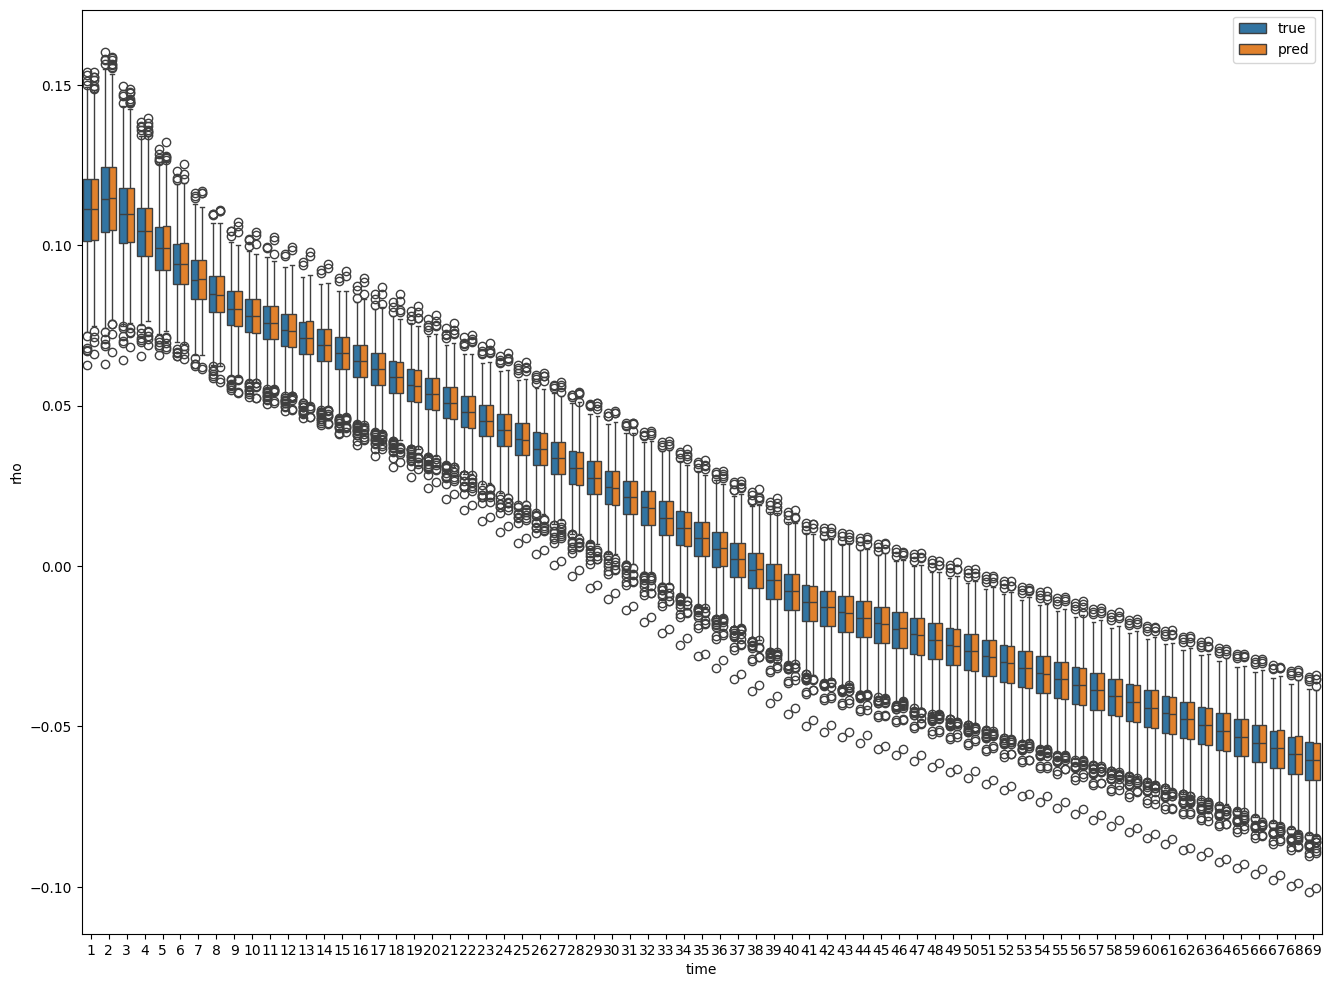

In [68]:
sns.boxplot(x='time', y='rho', data=df_long, hue='origin')
plt.legend(loc='upper right')
figure = plt.gcf()
figure.set_size_inches(16, 12)
figure.savefig('temp.png')

In [47]:
df_true = df[df['origin'] == 'true'].copy()
df_pred = df[df['origin'] == 'pred'].copy()

df_true.drop(columns=['origin'], inplace=True)
df_pred.drop(columns=['origin'], inplace=True)

df_true = pd.melt(df_true, id_vars=['line'], var_name='time', value_name='rho')
df_pred = pd.melt(df_pred, id_vars=['line'], var_name='time', value_name='rho')

df_true['time'] = df_true['time'].str.extract(r'(\d+)')
df_pred['time'] = df_pred['time'].str.extract(r'(\d+)')

df_errors = pd.merge(
    df_true,
    df_pred,
    how='left',
    on=['line', 'time'],
    suffixes=('_true', '_pred'))

df_errors['error'] = df_errors['rho_true'] - df_errors['rho_pred']
df_errors['square_error'] = df_errors['error'] ** 2
df_errors

,line,time,rho_true,rho_pred,error,square_error
0,0,1,0.121390,0.115789,0.005602,3.137840e-05
1,1,1,0.104425,0.109243,-0.004818,2.321484e-05
2,2,1,0.105179,0.101745,0.003434,1.179214e-05
3,3,1,0.114776,0.113505,0.001270,1.613707e-06
4,4,1,0.092269,0.089530,0.002739,7.500413e-06
...,...,...,...,...,...,...
137995,1995,69,-0.061210,-0.060738,-0.000472,2.223316e-07
137996,1996,69,-0.059154,-0.058866,-0.000288,8.293913e-08
137997,1997,69,-0.075604,-0.075666,0.000062,3.860440e-09
137998,1998,69,-0.059770,-0.059994,0.000224,5.039201e-08


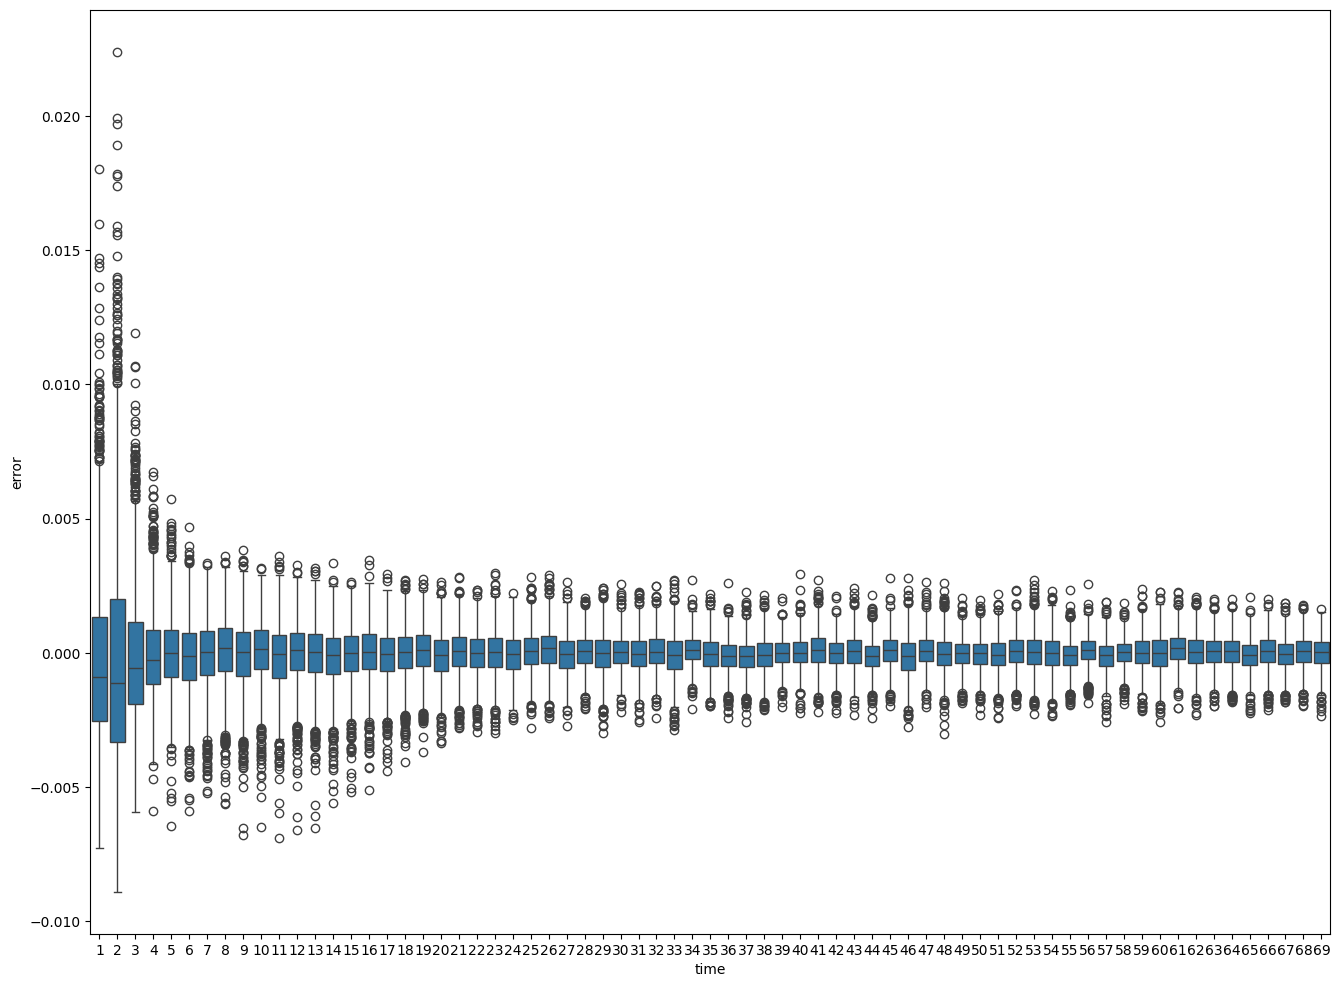

In [69]:
df_boxplot = df_errors[['time', 'error']].copy()
figure = plt.gcf()
figure.set_size_inches(16, 12)
sns.boxplot(x='time', y='error', data=df_boxplot)
figure.savefig('temp2.png')

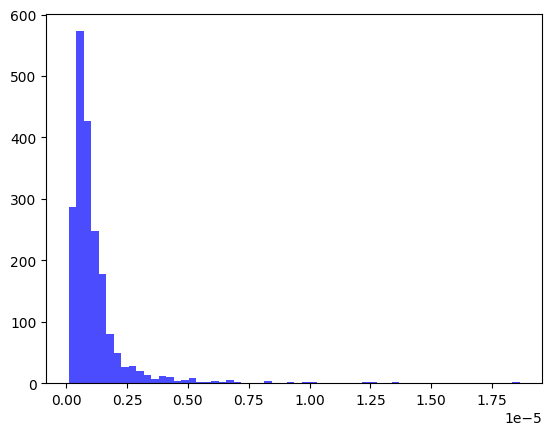

In [51]:
df_histogram = df_errors[['line', 'square_error']].copy()
df_histogram = df_histogram.groupby('line').agg(**{'RMSE': ('square_error', lambda x: sum(x) / len(x))})
plt.hist(df_histogram, bins=60, color='blue', alpha=0.7)
plt.show()

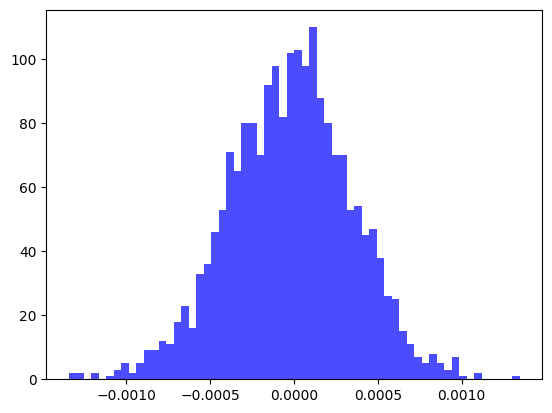

In [52]:
df_histogram2 = df_errors[['line', 'error']].copy()
df_histogram2 = df_histogram2.groupby('line').agg(**{'MSE': ('error', lambda x: sum(x) / len(x))})
plt.hist(df_histogram2, bins=60, color='blue', alpha=0.7)
plt.show()